<img src="zomato.jpg">

# Predicting Zomato Restaurants Rate

## 1. Business Problem

## 1.1 Problem Description

Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. 

- Does demography of area matters?
- Does location of particular type of restraurant depends on people living in that area>
- Does theme of restraurant matters?
- Is food chain category restraurant likely to have more customers than its counter part?
- Are any neighbourhood on similar based on the type of food?
- Is particular neighbours is famous for itw own kind of food?
- If two neighbours are similar does that mean these are related or particular group of people live in neighbourhood or these are places to eat.
- What kind of food is famous in locality.
- Do entire locality loves veg food, if yes then locality populated by particular set of people eg Jain, Gujarati,Marwadi who are basically veg.


## 1.2 Problem Statement

The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place. So we will try to predict rating for particular restaurant.

## 1.3 Real world/Business Objectives

We need to predict rating based on different parameters like Average_cost for two people, Online Order available, foods,menu list, most liked dishes etc features.

## 1.4 Machine Learning Formulation

Here we suppose to predicted rating of restaurant, so it is basically **Regression** problem.

## 1.5 Perfomance Metric

We will try to reduce Mean Square Error ie **MSE** as minimum as possible. So it is **Regression** problem reducing **MSE**.
- Ideal MSE is 0.

## 2. Machine Learning Problem

### 2.1 Data

#### Data Acquire

https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

### 2.1.1 Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder

from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
data = pd.read_csv('zomato.csv')
data.shape

(51717, 17)

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

#### Observation

Rate, dish_liked, phone , approx_cost(for two people) values are missing.

In [6]:
data['votes'].describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

#### Observation
- Minimum vote's value is 0, can be interpret as there are some restaurants who have 0 vote
- Maximum vote's value is 16832, there is a restaurant who has 16832.
- Average vote's values is 284, so average 284 votes for restaurant

In [7]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### Columns description

- url: contains the url of the restaurant in the zomato website

- address: contains the address of the restaurant in Bengaluru

- name: contains the name of the restaurant

- online_order: whether online ordering is available in the restaurant or not

- book_table: table book option available or not

- rate: contains the overall rating of the restaurant out of 5

- votes: contains total number of rating for the restaurant as of the above mentioned date

- phone: contains the phone number of the restaurant

- location: contains the neighborhood in which the restaurant is located

- rest_type: restaurant type

- dish_liked: dishes people liked in the restaurant

- cuisines: food styles, separated by comma

- approx_cost(for two people): contains the approximate cost for meal for two people

- reviews_list: list of tuples containing reviews for the restaurant, each tuple

- menu_item: contains list of menus available in the restaurant

- listed_in(type): type of meal

- listed_in(city): contains the neighborhood in which the restaurant is listed

### 2.2 Data Preprocess

###  2.2.1 Adjust column names and dropped irrelevant columns

In [8]:
# explore columns related to the addrress
data.loc[:,['address','location','listed_in(city)']].sample(8,random_state=1)

,address,location,listed_in(city)
8157,"2A/3, 15th Cross, Green Garden Layout, Shirdi ...",Marathahalli,Brookefield
32498,"18, Shreenidhi Arcade, Maruthi Nagar Main Road...",BTM,Koramangala 6th Block
4679,"56, Near Passport Office, Outer Ring Road, Bel...",Bellandur,Bellandur
2445,"14/6, 9th Main Road, Opposite Water Tank, 100 ...",BTM,Bannerghatta Road
27316,"321/3A, Sharif Complex, Hosur Main Road, Oppos...",Hosur Road,Koramangala 4th Block
2735,"4/5, 5th Cross, Laxmi Road, Shanti Nagar, Bang...",Shanti Nagar,Basavanagudi
34577,"9, Maruthi Nagar, Madiwala, BTM, Bangalore",BTM,Koramangala 6th Block
32233,"13th cross, 16th main, Tavarekere Main Road, B...",BTM,Koramangala 6th Block


Here, we can see that 3 column are representing same information, so just dropping column which are not important.
- we are going to keep the location column and drop the address and listed_in(city) columns
- columns url , phone , we are not interested in ,to be dropped too


In [9]:
# drop unnecessary columns
column_to_drop = ['address','url' ,'listed_in(city)', 'phone']
data.drop(columns=column_to_drop, axis=1,inplace=True)

In [10]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

###  2.2.2 Remove Duplicates

**Q.1) Is there duplicate values present in dataset? If yes then many of them are duplicate?**

In [11]:
# check for duplicate values
print("No of Duplicates in dataset:  ",data.duplicated().sum())

No of Duplicates in dataset:   9809


In [12]:
# drop the duplicates
data.drop_duplicates(inplace=True)

### 2.2.3 Removing Null values

**Q.2) Is there NULL values present in dataset? If yes then many they are (in %)?**

In [13]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           10.15
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

#### Observation:
- We can oberve that 54% dish_liked is missing as well as 15% rate values are missing.
- If we throw everything out, mean we are loosing more than 60% points.

**Q.3) Can we do something, can we save some of the points?**

***But before removing NULL values lets understand, Rate colomn.***

In [14]:
# check for unique values in the rate column
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### Observation:
- There are some points which has 'NEW' rating and '-' rating, which is completely incorrect.

In [15]:
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)

We can see that by default it has '/5' (divide by 5) arithmatic character, first we will remove this then proceed.

In [16]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

data['rate'].head(2)

0    4.1
1    4.1
Name: rate, dtype: float64

***As we understood Rate colomn above, lets understand, dish_liked***<br>
But before that first go throght "Review_List"

In [17]:
type(data.reviews_list[0])

str

In [18]:
# return to a list of tuples
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))
type(data.reviews_list[0])

list

In [19]:
# check for the first input
data.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

#### Observation:
- We can see that in "Review_List" starting line come up with rating. 'Rated 4.0'.
- We can use this values and filled up 'Rate' colomn.

**Q3A. Can we use this values as fill up in 'Rate' Colomn wherever it is missing? If yes then image we have saved that data point,ie information.**

In [20]:
# extract the rate for the first input from the review column
extracted = [float(i[0].replace('Rated','').strip()) for i in data.reviews_list[0]]
extracted

[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0]

Above are review for particular restaurant, we can use mean value.

In [21]:
extracted_mean = round((sum(extracted)/len(extracted)),1)
extracted_mean

4.1

- This is great. Lets Compare this value with 'Rate' colomn value.

In [22]:
print("Extracted Rate: ",extracted_mean)
print("Original Rate: ",data.rate[0])

Extracted Rate:  4.1
Original Rate:  4.1


- This is brillliant, lets do for all.

In [23]:
def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)

In [24]:
# create new column
data['review_rate']  = data.reviews_list.apply(lambda x : extract_features_from_review_list(x))

In [25]:
## Compare "Original Rate" vs "Rate extracted from Review List"
data.loc[:,['rate','review_rate']].sample(10,random_state=1)

,rate,review_rate
43076,4.0,4.0
49259,3.3,NaN
43257,4.5,4.2
30157,3.3,3.1
41110,3.8,4.0
34220,4.0,4.0
42520,3.0,3.3
45657,3.2,2.3
38218,3.3,3.9
4568,NaN,3.5


- Quite Closer.
- Ok, so we can replace missing value with this new adjustment.

In [26]:
# get the before number of null values
data.rate.isna().sum()

5914

In [27]:
# apply the changes
nan_index = data.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'review_rate'] 

In [28]:
# update the number of null values now
data.rate.isna().sum()

4861

- Please notice we have saved more than 1000 points.

In [29]:
# check now
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           11.60
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
review_rate                    25.71
dtype: float64

- Purpose behind filling missing values has being accomplished, we can remove 'review_rate' colomn

Now we will remove missing values, from 'rate' and 'average_cost' colomn

In [30]:
# drop null values
data.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [31]:
# check shape
data.shape

(36840, 14)

In [32]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        121
dish_liked                     15277
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
review_rate                     5889
dtype: int64

#### Observation:
- Here count 0 means there is no missing value.

In [33]:
# remove cuisines missing values
data=data[data.cuisines.isna()==False]

In [34]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [35]:
# check for percentage of null values 
((data.isna().sum()/data.shape[0])*100).round(2)

name                0.00
online_order        0.00
book_table          0.00
rate                0.00
votes               0.00
location            0.00
rest_type           0.33
dish_liked         41.46
cuisines            0.00
average_cost        0.00
reviews_list        0.00
menu_item           0.00
listed_in(type)     0.00
review_rate        15.98
dtype: float64

In [36]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [37]:
menu_list = []

# collect the dishes' names and make a menu list for all kind of dishes
for dish in data.dish_liked.tolist():
    if isinstance(dish,str) and len(dish)>0:
        for e in dish.split(','):
            menu_list.append(e)
len(menu_list)

118363

In [38]:
# Now collect the unique dish name 
menu_set = set(menu_list)

As we replace review_rate into missing rate values can we do the same here.<br><br>
**Q.3B) Can we replace missing 'dish_liked' with 'menu_list' values?**

In [39]:
# clear the text
def clear_text(t):
    '''
    clear the input text t
    '''
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
           replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [40]:
# make a new column reviews_text
data['reviews_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [41]:
# check part of reviews text for the first restaurant
data.reviews_text[0][:500]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrange'

**Clean up dist_like**
- convert text to lower case.
- missing value could extract from review_list

In [42]:
data.dish_liked.nunique()

5250

In [43]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [44]:
# example
data.dish_liked[10000]

nan

In [45]:
# the solution 
menu_set.intersection(data.reviews_text[10000].split(' '))

{'chicken', 'fish', 'rice', 'thali'}

In [46]:
#creat a new column for the reviewed dish
data['dish_n_review'] = data.reviews_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [47]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

,dish_liked,dish_n_review
32901,NaN,"kheer, halwa"
44323,NaN,"rice, prawn, chicken, shawarma, tikka"
6479,NaN,
11046,NaN,rice
50112,NaN,"coffee, cappuccino"


So now, we can replace this missed values from the dish_n_review

In [48]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = data.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    data.loc[i,'dish_liked'] = data.loc[i,'dish_n_review']

In [49]:
# Now let's test our work
data.dish_liked[10000]

'chicken, rice, fish, thali'

- Now we can drop the menu_list & menu_set


In [50]:
del menu_list
del menu_set

In [51]:
# first let's drop the review_rate column now
data.drop(columns=['reviews_text','review_rate','dish_n_review'],axis=1,inplace=True)

In [52]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name               0.000
online_order       0.000
book_table         0.000
rate               0.000
votes              0.000
location           0.000
rest_type          0.329
dish_liked         0.000
cuisines           0.000
average_cost       0.000
reviews_list       0.000
menu_item          0.000
listed_in(type)    0.000
dtype: float64

In [53]:
data.shape

(36832, 13)

- Now thing looked quite good. There is no missing values.

### 2.1.2 Data Visualizations

**Q.4) What is distrubution of 'Rate column'?**

Now it is fine, now we can proceed.

Mean is :  3.7208921589921804


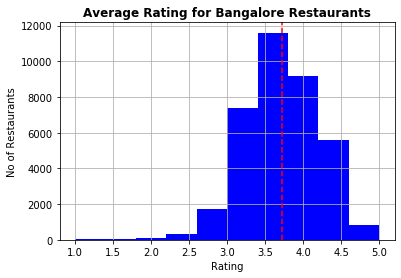

In [54]:
data.rate.hist(color='blue')
plt.axvline(x= data.rate.mean(),ls='--',color='red')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print("Mean is : ",data.rate.mean())

#### Observation:
- Average rating is 3.7 in banglore for zomato.

**Q.5) Which are the top 20 restaurant in the Banglore? What is their count**

In [55]:
data.name.value_counts().head()

Onesta               85
Cafe Coffee Day      84
Empire Restaurant    69
Kanti Sweets         66
Just Bake            62
Name: name, dtype: int64

Text(0.5, 1.0, 'Name Vs Number of Restaurants')

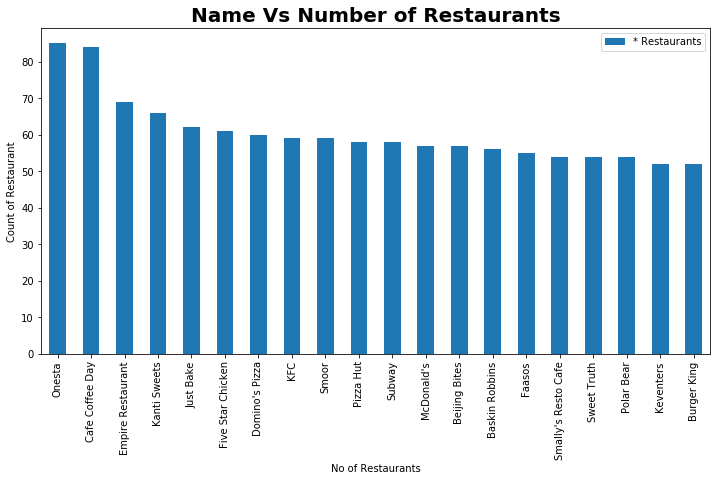

In [56]:
plt.figure(figsize=(12,6))
ax =data.name.value_counts()[:20].plot(kind='bar')
ax.legend(['* Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

#### Observation

- we can say that 'Onesta' day has highest count among all

**Q.6) How many Restaurant accepting online orders?**

Yes    24969
No     11863
Name: online_order, dtype: int64

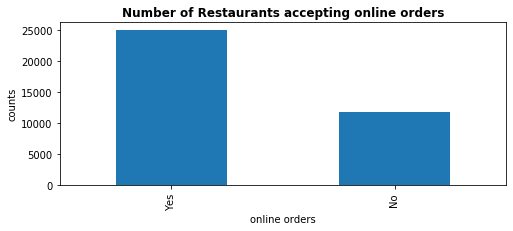

In [57]:
plt.figure(figsize=(8,3))
ax =data.online_order.value_counts().plot(kind='bar')
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')
plt.ylabel('counts')

data.online_order.value_counts()

#### Observation:
- Most of order are onlines.
- no missing values in online order colomn

**Q.7) How many Restaurant have option to book a table?**

No     30799
Yes     6033
Name: book_table, dtype: int64

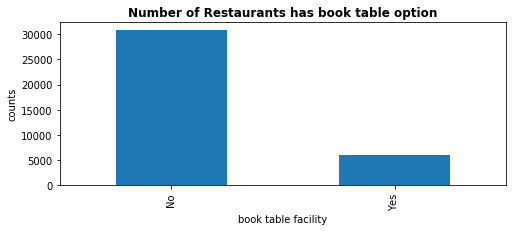

In [58]:
plt.figure(figsize=(8,3))
ax =data.book_table.value_counts().plot(kind='bar')
plt.title('Number of Restaurants has book table option', weight='bold')
plt.xlabel('book table facility')
plt.ylabel('counts')

data.book_table.value_counts()

#### Observation
- Most of restaurant do not have book table facility

**Q.8) In banglore city,in which area has maximum number of restaurants? Also find percetage for the same.**

Text(0.5, 1.0, 'Location')

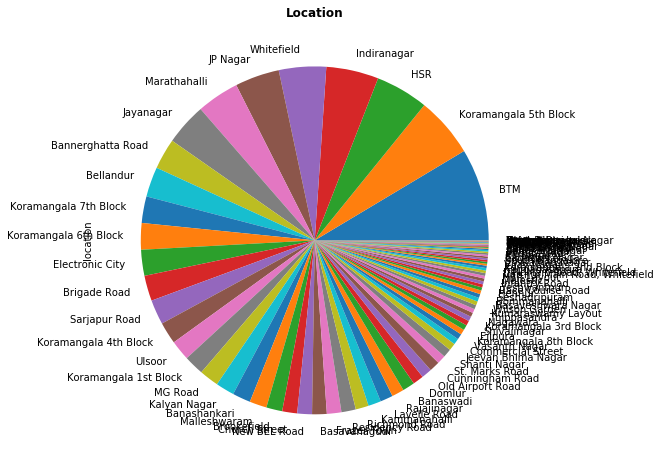

In [59]:
plt.figure(figsize=(8,8))
ax =data.location.value_counts().plot(kind='pie')
plt.title('Location', weight='bold')

Its very complicated to understand so we will limit ourself to TOP 10 locations

Text(0.5, 1.0, 'Location')

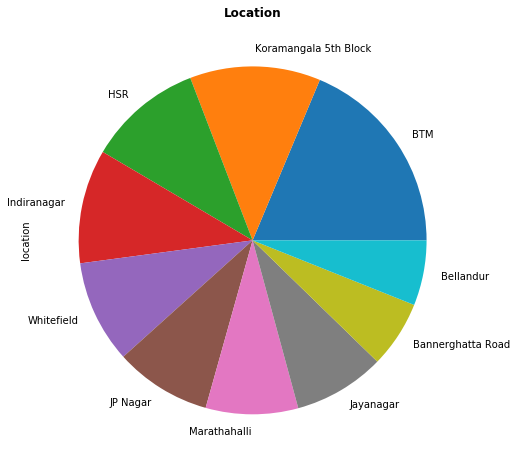

In [60]:
plt.figure(figsize=(8,8))
ax =data.location.value_counts()[:10].plot(kind='pie')
plt.title('Location', weight='bold')

#### Observation
- We can say that BTM location, where most of restaurant are available

**Q9.1) Percentage.**

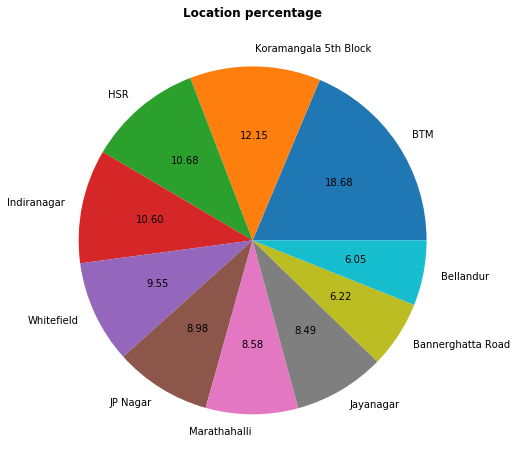

In [61]:
## https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

plt.figure(figsize=(8,8))
values = data.location.value_counts()[:10]
labels = data['location'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Location percentage', weight='bold')
plt.show()

#### Observation:

Now picture seems very clear, maximum restaurant are in BTM follows by HSR,Koramangla, JP Nagar, .. so on.

**Q9.2 Now, we know percentage of top 10 area, lets find count of each area.**

Text(0, 0.5, 'counts')

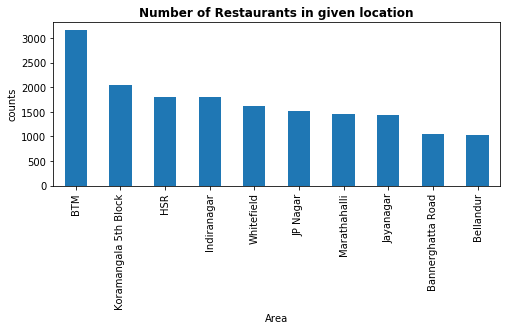

In [62]:
plt.figure(figsize=(8,3))
ax =data.location.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

#### Observation

- BTM area has around 3k restaurants.

In [63]:
data['location'].nunique() ## Neighbourhoods in banglore 

92

**Q.10) What type of restaurant are there in banglore? also percetage and counts**

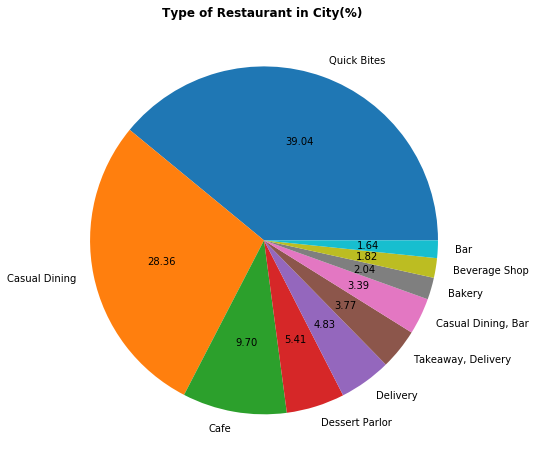

In [64]:
plt.figure(figsize=(8,8))
values = data.rest_type.value_counts()[:10]
labels = data['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

Text(0, 0.5, 'counts')

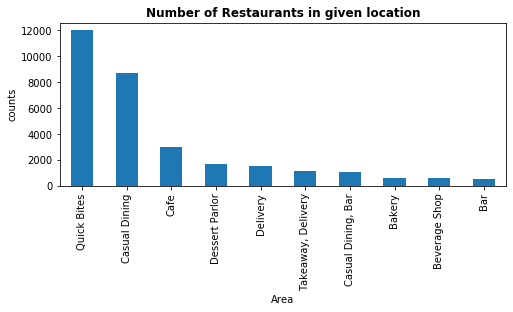

In [65]:
plt.figure(figsize=(8,3))
ax =data.rest_type.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

#### Observation

- "Quick beats" is leading in the race, which is close to 12k follow by "Causal Dining" which is around 8K

**Q.11) What is the Average cost in restaurants?**

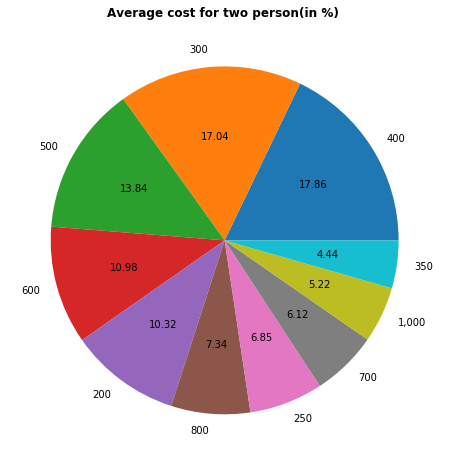

In [66]:
plt.figure(figsize=(8,8))
values = data.average_cost.value_counts()[:10]
labels = data['average_cost'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.show()

#### Observation
There is 17.86% percetage chances that for two person average cost will be 400 and 17.04% chance that cost will be 300. so on.

**Q.12) Which dish are most famous/favourite dish in restaurants?**

In [67]:
data.dish_liked.nunique()

7479

Before we dive in remember that at initial stages we observe that dist_like colomn has some missing values. so first remove missing values then proceed.

In [68]:
#lets delete the nulll values

data1 = data.copy()

dishes_data = data1[data1.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [69]:
dishes_data.isnull().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
location             0
rest_type          121
dish_liked           0
cuisines             0
average_cost         0
reviews_list         0
menu_item            0
listed_in(type)      0
dtype: int64

In [70]:
dishes_data.dish_liked[:10]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
5    onion rings, pasta, kadhai paneer, salads, sal...
6                                              chicken
7    farmhouse pizza, chocolate banana, virgin moji...
8    pizza, mocktails, coffee, nachos, salad, pasta...
9    waffles, pasta, coleslaw sandwich, choco waffl...
Name: dish_liked, dtype: object

We can see that each row has contained multiple dishes separated by "commma".

In [71]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked: ## iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

In [72]:
dish_count[:10] #lets see favourite top 10 dishes

['pasta',
 'lunch buffet',
 'masala papad',
 'paneer lajawab',
 'tomato shorba',
 'dum biryani',
 'sweet corn soup',
 'momos',
 'lunch buffet',
 'chocolate nirvana']

Text(0, 0.5, 'Count')

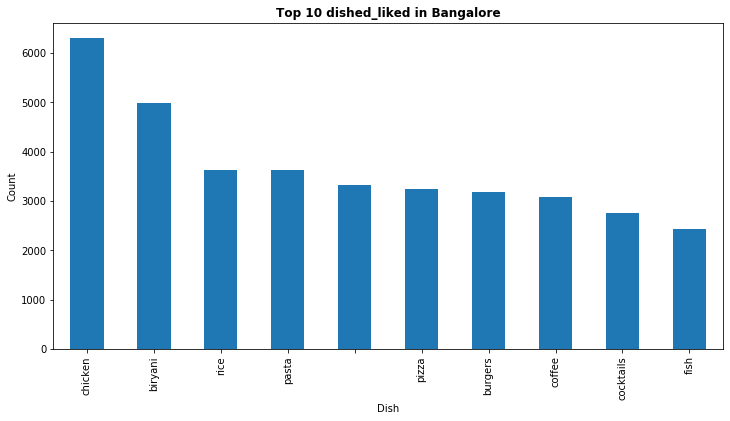

In [73]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

#### Observation

- We can see that 'pasta' is most favourite dish followed by 'burger' followed by 'cocktails'.

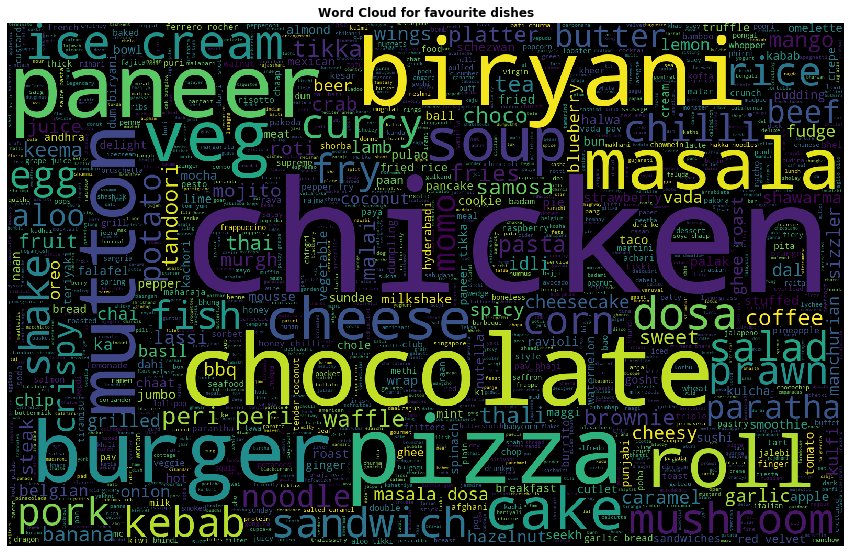

In [74]:
dish_set = set(dish_count)
dish_word_cloud = ', '.join(dish_set)

plt.figure( figsize=(15,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(dish_word_cloud))
wc.generate(dish_word_cloud)
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for favourite dishes',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()

**Q.9) Lets see 'Rate' vs 'Restaurant type' graph.**

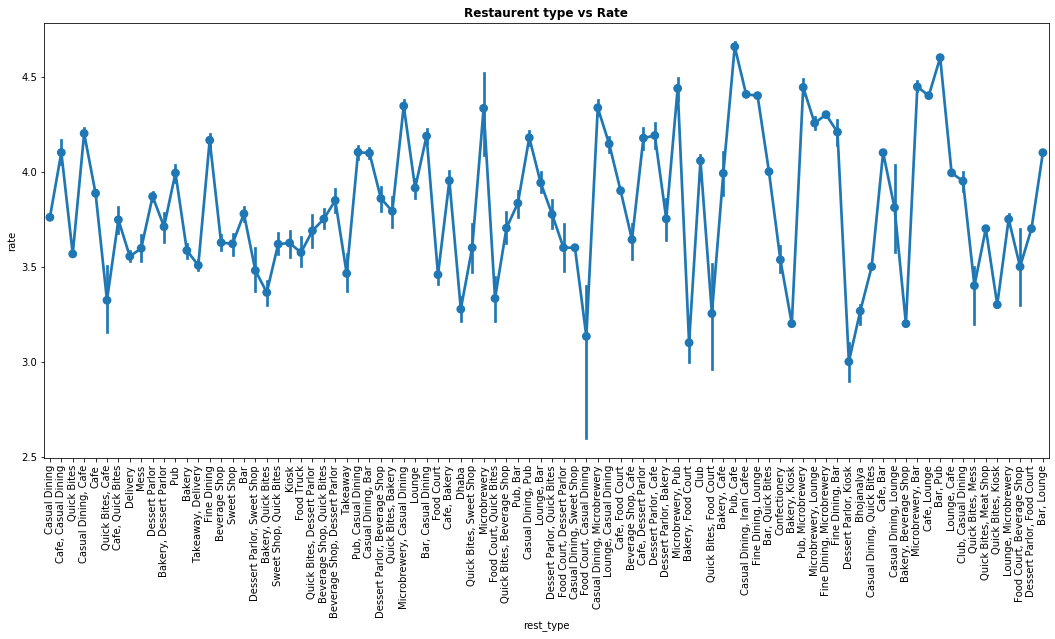

In [75]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

**Q.10) Print top 10 Cuisines**

In [76]:
cuisines_data = data[data.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [77]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

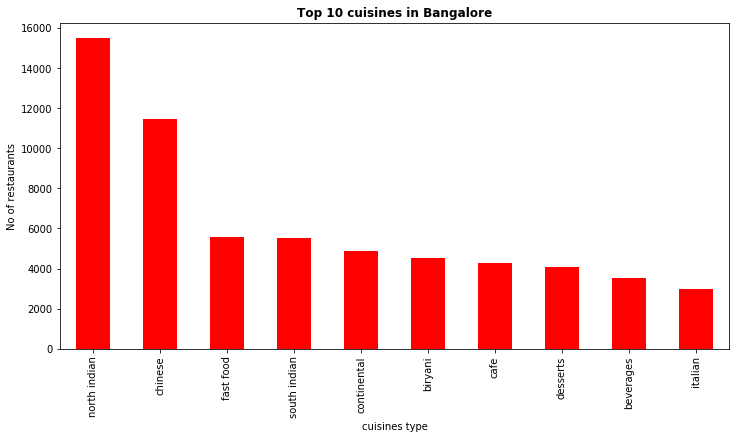

In [78]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

#### Observation
- North Indian food is at top, followed by chinease and so on.

In [79]:
cuisines_set = set(cuisines_count)
cuisines_word_cloud = ', '.join(cuisines_set)

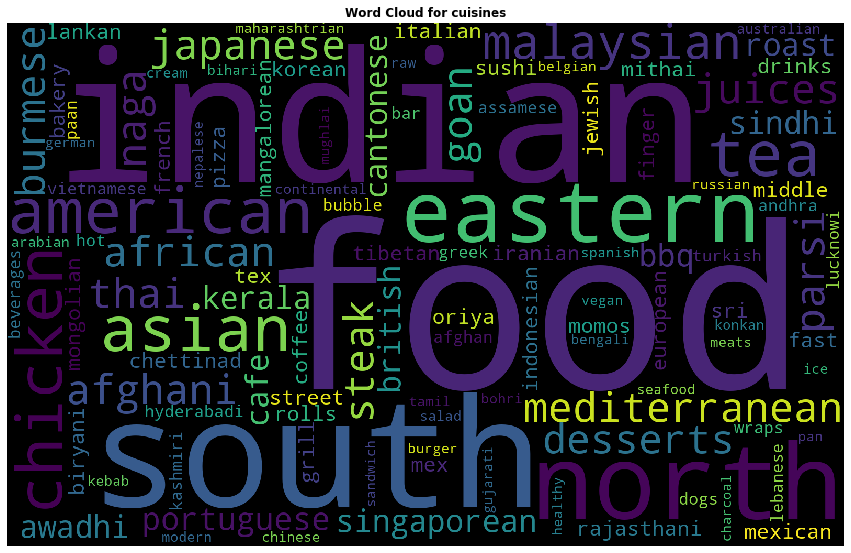

In [80]:
plt.figure( figsize=(15,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(cuisines_word_cloud))
wc.generate(cuisines_word_cloud)
plt.title('Word Cloud for cuisines',weight='bold')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.imshow(wc)
plt.show()

**Q.11) Lets plot 'Rate' vs 'Online order'**

Text(0.5, 1.0, 'rate vs oline order')

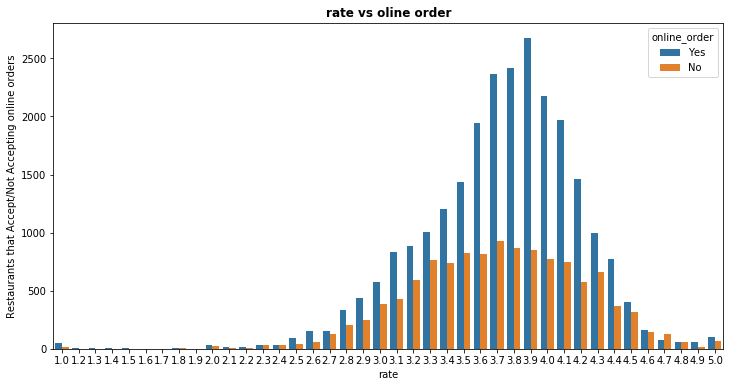

In [82]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['rate'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

## 3. Model

Till now we were understanding, visualising data. Now let move to build proper Machine Learning model.

In [83]:
# pd.get_dummies ==> Convert categorical variable into dummy/indicator variables.(OneHot encoding)

data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,0,0,3.7,34,Whitefield,"Casual Dining, Bar","chicken, rice, fish","North Indian, Continental",800,"[(Rated 4.0, RATED\n Ambience- Big and spacio...",[],Pubs and bars
51711,Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","biryani, andhra meal","Andhra, South Indian, Chinese, North Indian",800,"[(Rated 4.0, RATED\n A fine place to chill af...",[],Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,"chicken, mocktails, cocktails, decor",Continental,"1,500","[(Rated 5.0, RATED\n Food and service are inc...",[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,"cocktails, pizza, buttermilk",Finger Food,"2,500","[(Rated 4.0, RATED\n Nice and friendly place ...",[],Pubs and bars


In [84]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost', 'reviews_list',
       'menu_item', 'listed_in(type)'],
      dtype='object')

In [85]:
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

In [86]:
data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

Bites Quick       12006
Casual Dining      8720
Cafe               2982
Dessert Parlor     1665
Delivery           1486
Name: rest_type, dtype: int64

In [87]:
data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

Chinese Indian North                 1956
Indian North                         1907
Indian South                         1034
Chinese Indian Indian North South     941
Bakery Desserts                       698
Name: cuisines, dtype: int64

In [88]:
data['average_cost'] = data['average_cost'].str.replace(',' , '') 
data['average_cost'] = data['average_cost'].apply(int)

In [89]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800
2,San Churro Cafe,1,0,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800


In [90]:
x = data.drop(['rate','name'],axis = 1)
y = data['rate']

In [91]:
print(x.shape)
print(y.shape)

(36832, 7)
(36832,)


## 3.1 Splitting the data for Model Building 

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [94]:
# from joblib import dump,load

dump(X_train, 'more_feature_X_train')
dump(X_test, 'more_feature_X_test')
dump(y_train, 'more_feature_y_train')
dump(y_test, 'more_feature_y_test')

['more_feature_y_test']

In [96]:
X_train = load('more_feature_X_train')
X_test = load('more_feature_X_test')
y_train = load('more_feature_y_train')
y_test = load('more_feature_y_test')

In [97]:
X_train.head(2)

,online_order,book_table,votes,location,rest_type,cuisines,average_cost
34072,0,1,1390,Koramangala 5th Block,Lounge,Continental Indian North,1400
51088,1,1,1218,Whitefield,Pub,American Asian Mexican,1200


In [98]:
enc = OneHotEncoder( handle_unknown='ignore')

In [99]:
## ALWAYS AVOID DATA LEAKAGE

# this method is for training data set
def one_hot_fit_transform(df,name):
    output_data = df[name].values.reshape(-1, 1)
    return enc.fit_transform(output_data).toarray()

# this method is for test data set
def one_hot_transform(df,name):
    output_data1 = df[name].values.reshape(-1, 1)
    return enc.transform(output_data1).toarray()

In [100]:
# one hot encoding apply to 'rest_type' features on train/test dataset
tr_dummy_rest_type = one_hot_fit_transform(X_train,'rest_type' )
te_dummy_rest_type= one_hot_transform(X_test,'rest_type' )

# one hot encoding apply to 'location' features on train/test dataset
tr_dummy_city = one_hot_fit_transform(X_train,'location' )
te_dummy_city= one_hot_transform(X_test,'location')

# one hot encoding apply to 'cuisines' features on train/test dataset
tr_dummy_cuisines = one_hot_fit_transform(X_train,'cuisines' )
te_dummy_cuisines=one_hot_transform(X_test,'cuisines')

In [101]:
tr_dummy_rest_type.shape, te_dummy_rest_type.shape

((25782, 67), (11050, 67))

In [102]:
tr_dummy_city.shape, te_dummy_city.shape

((25782, 92), (11050, 92))

In [103]:
tr_dummy_cuisines.shape, te_dummy_cuisines.shape

((25782, 1674), (11050, 1674))

In [104]:
## combine all 'one-hot' encoded features as Tr.
tr =pd.DataFrame(pd.np.column_stack([ tr_dummy_rest_type,tr_dummy_city, tr_dummy_cuisines]))

## CONCAT both dataframe ### ie Tr and X_train(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l1=X_train.values.tolist()
l2=tr.values.tolist()

for i in range(len(l1)):
    l1[i].extend(l2[i])

X_train=pd.DataFrame(l1,columns=X_train.columns.tolist()+tr.columns.tolist())
X_train.shape

(25782, 1840)

In [105]:
## combine all 'one-hot' encoded features as Te.
te =pd.DataFrame(pd.np.column_stack([ te_dummy_rest_type,te_dummy_city,te_dummy_cuisines]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=X_test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=X_test.columns.tolist()+te.columns.tolist())
X_test.shape

(11050, 1840)

In [106]:
# after onehot encoding DONE. 'location','rest_type','cuisines' are redundant features. REMOVE them.

X_train =X_train.drop(['location','rest_type','cuisines'],axis = 1)
X_test =X_test.drop(['location','rest_type','cuisines'],axis = 1)

In [107]:
X_train.head(3)

,online_order,book_table,votes,average_cost,0,1,2,3,4,5,...,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832
0,0,1,1390,1400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1218,1200,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,34,300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now it is looking good. We can proceed.

In [108]:
# checking final train set shape
X_train.shape, y_train.shape

((25782, 1837), (25782,))

In [109]:
# # checking final test set shape
X_test.shape, y_test.shape

((11050, 1837), (11050,))

In [110]:
dump(X_train, 'more_feature_X_train')
dump(X_test, 'more_feature_X_test')
dump(y_train, 'more_feature_y_train')
dump(y_test, 'more_feature_y_test')

['more_feature_y_test']

In [111]:
X_train= load('more_feature_X_train') 
X_test= load('more_feature_X_test')
y_train= load('more_feature_y_train')
y_test= load('more_feature_y_test')

In [112]:
def mse(y, y_pred):
    return np.mean((y_pred - y)**2)

mse_scorer = make_scorer(mse, greater_is_better=False)

In [113]:
# https://github.com/erykml/medium_articles/blob/master/Machine%20Learning/feature_importance.ipynb

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

## Model -1 Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

mse(y_test, y_pred_lr)

32663352136289.91

## Model - 2 SGD Regressor

In [115]:
from sklearn import linear_model

sgdReg = linear_model.SGDRegressor()
sgdReg.fit(X_train,y_train)
y_pred_sgdr = sgdReg.predict(X_test)

mse(y_test, y_pred_sgdr)

2.206554830026382e+28

## Model -3 Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.039922098937852236

**Without any hyper param tuning RFR ie Random Forest Regressor it learning something. so let experiment on RFR.**

## Hyperparam Tuning on RFR

In [117]:
tuned_parameters = {'n_estimators': [250,500,1000,1200]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 1489.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [250, 500, 1000,

After above experiment we got below result

- MSE:  0.034853600229303999 == 200 (n_estimators)
- MSE:  0.034615859400387666 ==250 (n_estimators)
- MSE:  0.0333620113806332284 == 500 (n_estimators)
- MSE:  0.033503516544483965 ===1000 (n_estimators)
- MSE:  0.033083536144839625 ===1200 (n_estimators)

We can clearly see that MSE values is dropping but fact is to run 1200 estimators it take more than 4.5 hours on my system(i5 7Gen, 16GB RAM), to run 1000 n_estimators is took almost 3 hours.

So we can reduce MSE value further but training time is increases accordingly so I decide to stop on this experiments.

Final n_estimators choose 200.

## Best Parameter Model

In [118]:
rfr = RandomForestRegressor(max_depth=None,n_estimators=200,min_samples_split= 2)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.033928203395383064

## Let's Visualise output by comparing y_true vs y_pred

In [119]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
17780,3.6,3.562350
35810,3.8,3.776500
25324,4.1,4.100500
13990,3.5,3.464500
8655,3.1,3.064368
...,...,...
46443,3.9,3.899000
24395,4.0,3.945000
21119,3.7,3.593042
43452,4.0,3.995500


### MSE = 0.0348 , It is good Model still can we still improved Model?

## Not Null Features only

Till now, we have considered **ONE-HOT** encoding of on below features. 
- rest_type
- location
- cuisines
- online_order	
- book_table


Here we are going to include below features also,
- dish_liked
- cuisines

Obviously we have to deal with large features set.

In [120]:
onehot = pd.read_csv("zomato.csv")
onehot.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [121]:
onehot.shape

(51717, 17)

In [122]:
# check for duplicate values
print("No of Duplicates in dataset:  ",onehot.duplicated().sum())
# drop the duplicates
onehot.drop_duplicates(inplace=True)

No of Duplicates in dataset:   0


In [123]:
# check for duplicate values
print("No of Duplicates in dataset:  ",onehot.duplicated().sum())

No of Duplicates in dataset:   0


***This time we will drop all Null values. Last time we saved some Null values by converting them to relative values.  But in this run we will neglect  all values null. Initially there are 51k values by removing NULL it will be somewhere around 23k. Frankly speaking 23k is also good enough points to experiment.***

In [124]:
onehot['rate'] = onehot['rate'].replace('NEW',np.NaN) # replace 'NEW' values with NaN
onehot['rate'] = onehot['rate'].replace('-',np.NaN) # replace '-' value with NaN
onehot.dropna(how = 'any', inplace = True) # remove all NaN

onehot['rate'] = onehot.loc[:,'rate'].replace('[ ]','',regex = True) # replace [] with '' string
onehot['rate'] = onehot['rate'].astype(str) # convert to string
onehot['rate'] = onehot['rate'].apply(lambda r: r.replace('/5','')) # replace '/5' character with '' string
onehot['rate'] = onehot['rate'].apply(lambda r: float(r)) # convert string back to float

In [125]:
onehot.shape

(23046, 17)

In [126]:
onehot['cuisines'] = onehot['cuisines'].str.replace(',' , '') # replace ',' with '' string
onehot['cuisines'] = onehot['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split()))) # add white space
onehot['cuisines'].unique() # find unique values

array(['Chinese Indian Mughlai North', 'Chinese Indian North Thai',
       'Cafe Italian Mexican', ...,
       'BBQ Continental Indian Italian North', 'Nepalese Tibetan',
       'Andhra Biryani Hyderabadi'], dtype=object)

In [127]:
onehot['rest_type'] = onehot['rest_type'].str.replace(',' , '') 
onehot['rest_type'] = onehot['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['rest_type'].value_counts().head()

Casual Dining        7298
Bites Quick          5224
Cafe                 2321
Bar Casual Dining    1308
Dessert Parlor       1074
Name: rest_type, dtype: int64

In [128]:
onehot['dish_liked'] = onehot['dish_liked'].str.replace(',' , '') 
onehot['dish_liked'] = onehot['dish_liked'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['dish_liked'].value_counts().head()

Biryani            179
Friendly Staff      68
Waffles             67
Biryani Chicken     66
Paratha             56
Name: dish_liked, dtype: int64

In [129]:
onehot['approx_cost(for two people)'] = onehot['approx_cost(for two people)'].str.replace(',' , '') 
onehot.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [130]:
x = onehot.drop(['rate','name'],axis = 1)
y = onehot['rate']

### Train Test Split

In [131]:
train_data,test_data,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [136]:
 dump(train_data, 'train_data')
 dump(test_data, 'test_data')
 dump(y_train, 'y_train')
 dump(y_test, 'y_test')

['y_test']

In [137]:
train_data.shape

(16132, 15)

In [138]:
test_data.shape

(6914, 15)

In [139]:
train_data = load('train_data')
test_data = load('test_data')
y_train = load('y_train')
y_test = load('y_test')

In [140]:
all_features =[]
# test_feature=[]

### One Hot Encoding 

In [141]:
enc = OneHotEncoder( handle_unknown='ignore')

In [142]:
## ALWAYS AVOID DATA LEAKAGE

# this method is for training data set
def one_hot_fit_transform(df,name):
    output_data = df[name].values.reshape(-1, 1)
    return enc.fit_transform(output_data).toarray(), enc.get_feature_names([name])

# this method is for test data set
def one_hot_transform(df,name):
    output_data1 = df[name].values.reshape(-1, 1)
    return enc.transform(output_data1).toarray()

In [143]:
tr_dummy_rest_type,rest_tr = one_hot_fit_transform(train_data,'rest_type' )
te_dummy_rest_type = one_hot_transform(test_data,'rest_type' )
all_features.extend(rest_tr)


tr_dummy_online_order, oo_tr = one_hot_fit_transform(train_data,'online_order' )
te_dummy_online_order = one_hot_transform(test_data,'online_order' )
all_features.extend(oo_tr)

tr_dummy_book_table,bt_tr = one_hot_fit_transform(train_data,'book_table' )
te_dummy_book_table = one_hot_transform(test_data,'book_table' )
all_features.extend(bt_tr)
# test_feature.append(bt_te)

tr_dummy_city,loc_tr = one_hot_fit_transform(train_data,'location' )
te_dummy_city = one_hot_transform(test_data,'location')
all_features.extend(loc_tr)
# test_feature.append(loc_te)

tr_dummy_cuisines,cui_tr = one_hot_fit_transform(train_data,'cuisines' )
te_dummy_cuisines =one_hot_transform(test_data,'cuisines')
all_features.extend(cui_tr)
# test_feature.append(rest_tr)

tr_dummy_dishliked,dish_tr = one_hot_fit_transform(train_data,'dish_liked' )
te_dummy_dishliked=one_hot_transform(test_data,'dish_liked')
all_features.extend(dish_tr)
# test_feature.append(rest_tr)

In [144]:
len(all_features)

5831

In [145]:
tr_dummy_rest_type.shape, te_dummy_rest_type.shape

((16132, 52), (6914, 52))

In [146]:
tr_dummy_online_order.shape, te_dummy_online_order.shape

((16132, 2), (6914, 2))

In [147]:
tr_dummy_book_table.shape, te_dummy_book_table.shape

((16132, 2), (6914, 2))

In [148]:
tr_dummy_city.shape, te_dummy_city.shape

((16132, 88), (6914, 88))

In [149]:
tr_dummy_cuisines.shape, te_dummy_cuisines.shape

((16132, 1254), (6914, 1254))

In [150]:
tr_dummy_dishliked.shape, te_dummy_dishliked.shape

((16132, 4433), (6914, 4433))

In [151]:
type(tr_dummy_dishliked)

numpy.ndarray

In [152]:
type(train_data)

pandas.core.frame.DataFrame

### Create Final Train DF (Concate two Dataframes)

In [153]:
tr =pd.DataFrame(pd.np.column_stack([tr_dummy_rest_type, tr_dummy_online_order,tr_dummy_book_table ,tr_dummy_city,
                                 tr_dummy_cuisines,tr_dummy_dishliked]), columns=all_features)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l1=train_data.values.tolist()
l2=tr.values.tolist()

for i in range(len(l1)):
    l1[i].extend(l2[i])

X_train=pd.DataFrame(l1,columns=train_data.columns.tolist()+tr.columns.tolist())

In [154]:
X_train.shape

(16132, 5846)

### Create Final Test DF  (Concate two Dataframes)

In [155]:
te =pd.DataFrame(pd.np.column_stack([te_dummy_rest_type, te_dummy_online_order,te_dummy_book_table,te_dummy_city,
                                          te_dummy_cuisines,te_dummy_dishliked]),columns=all_features)


# X_test =pd.concat([test_data,te],axis=1)

l3=test_data.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=test_data.columns.tolist()+te.columns.tolist())
X_test.shape

(6914, 5846)

### Deleting the Unwanted columns 

After OneHot enconding Achieved we will simply remove, redudant features.

In [156]:
X_train.drop(columns=['rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table'], inplace=True)

In [157]:
X_test.drop(columns=['rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table'],axis=1 , inplace=True)

In [158]:
X_train.head(2)

,votes,average_cost,rest_type_Bakery,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Dessert Parlor,rest_type_Bar,rest_type_Bar Bites Quick,rest_type_Bar Cafe,rest_type_Bar Casual Dining,...,dish_liked_Sandwiches Tea,dish_liked_Shakes Thick,dish_liked_Shawarma,dish_liked_Tea,dish_liked_Thali,dish_liked_Thali Veg,dish_liked_Tikka,dish_liked_Vada,dish_liked_Vegetarian,dish_liked_Waffles
0,326,500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33,300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
X_train.shape

(16132, 5833)

In [160]:
X_test.head(2)

,votes,average_cost,rest_type_Bakery,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Dessert Parlor,rest_type_Bar,rest_type_Bar Bites Quick,rest_type_Bar Cafe,rest_type_Bar Casual Dining,...,dish_liked_Sandwiches Tea,dish_liked_Shakes Thick,dish_liked_Shawarma,dish_liked_Tea,dish_liked_Thali,dish_liked_Thali Veg,dish_liked_Tikka,dish_liked_Vada,dish_liked_Vegetarian,dish_liked_Waffles
0,1519,900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48,1500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
X_test.shape

(6914, 5833)

#### Persistence Object to local disk

In [162]:
# # from joblib import dump,load

dump(X_train, 'one_hot_X_train')
dump(X_test, 'one_hot_X_test')
dump(y_train, 'one_hot_y_train')
dump(y_test, 'one_hot_y_test')

['one_hot_y_test']

In [163]:
X_train = load('one_hot_X_train')
X_test = load('one_hot_X_test')
y_train = load('one_hot_y_train')
y_test = load('one_hot_y_test')

In [164]:
X_train.shape, y_train.shape

((16132, 5833), (16132,))

In [165]:
X_test.shape, y_test.shape

((6914, 5833), (6914,))

## Model -1 Linear Regression

In [166]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

mse(y_test, y_pred_lr)

0.04308853036748374

## Model -2 SGDRegressor

In [167]:
sgdReg = linear_model.SGDRegressor()
sgdReg.fit(X_train,y_train)
y_pred_sgdr = sgdReg.predict(X_test)

mse(y_test, y_pred_sgdr)

6.800050508682917e+29

## Model -3 Random Forest Regressor

In [168]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.015500046873282597

## Feature Importance

In [169]:
base_imp = imp_df(X_train.columns, rfr.feature_importances_)
base_imp[:10]

,feature,feature_importance
0,votes,0.272668
1,average_cost,0.053450
2,book_table_Yes,0.025427
3,rest_type_Dessert Parlor,0.021594
4,rest_type_Casual Dining,0.017140
5,cuisines_Chinese Indian North,0.013761
6,rest_type_Bites Quick,0.010922
7,dish_liked_Dance Dj Floor,0.008958
8,dish_liked_Burritos Chicken Margarita Mushroom...,0.006696
9,book_table_No,0.006336


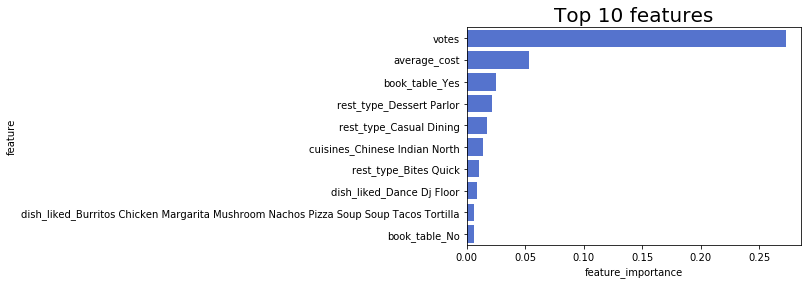

In [170]:
var_imp_plot(base_imp[:10],"Top 10 features")

#### Observation:

- This is brilliant, last we saw MSE =  0.015, **without hyperparam tuning.**

## Hyperparam Tuning for RFR One Hot Encoding

In [171]:
tuned_parameters = {'n_estimators': [250,500,1000,1200]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 1535.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [250, 500, 1000,

After above experiment we got below result

- MSE:  0.014044408085530756 == 200 (n_estimators)
- MSE:  0.014195859400387666 ==250 (n_estimators)
- MSE:  0.014120113806332284 == 500 (n_estimators)
- MSE:  0.014103516544483965 ===1000 (n_estimators)
- MSE:  0.014083536144839625 ===1200 (n_estimators)

We can clearly see that MSE values is dropping but fact is to run 1200 estimators it take more than 4.5 hours on my system(i5 7Gen, 16GB RAM), to run 1000 n_estimators is took almost 3 hours.

So we can reduce MSE value further but training time is increases accordingly so I decide to stop on this experiments.

Final n_estimators choose 300.

In [172]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators =300)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.014237167428841782

## Final model Features Importance

In [173]:
base_imp = imp_df(X_train.columns, rfr.feature_importances_)
base_imp[:10]

,feature,feature_importance
0,votes,0.270693
1,average_cost,0.052943
2,book_table_Yes,0.024895
3,rest_type_Dessert Parlor,0.021341
4,rest_type_Casual Dining,0.016969
5,cuisines_Chinese Indian North,0.012511
6,rest_type_Bites Quick,0.010029
7,dish_liked_Dance Dj Floor,0.008770
8,book_table_No,0.006528
9,cuisines_Mexican,0.006402


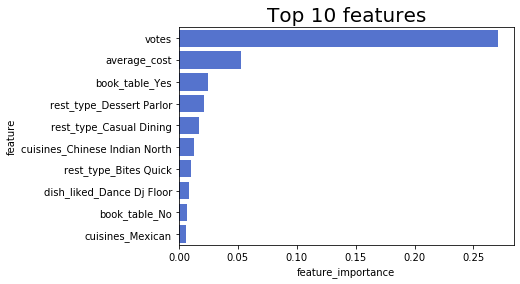

In [174]:
var_imp_plot(base_imp[:10],"Top 10 features")

## Visualise Output

In [175]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
35957,4.0,4.000667
4975,4.0,3.996333
21830,3.9,3.894533
11982,3.7,3.711667
2597,3.8,3.841333
...,...,...
19450,4.1,4.100667
32469,3.5,3.509000
3181,4.0,3.922333
3029,4.1,4.114333


# 4. Feature Engineering

Let's try ***response coding*** in categorical variable on regression model.
<br>

Basically what we are going to do replace categorical features with response coded features. In simple words we are going to consider each categorical feature once and find mean value of 'Rate' column.<br>


Eg.==><br>
Consider "online_order" feature, which has two categories, 'Yes' and 'No'. So we will do a small hack, which is explained as below,

- consider category as 'Yes' in 'online_order', take mean value of 'Rate'
- similarly consider second category as 'No' in 'online_order', take mean value of 'Rate' column.
- We will perform above logic using ***group_by*** on desired categorical column and simple take a mean of 'Rate' column. 
- Create new column which will contain mean values.
- we will called it as **MEAN VALUE REPLACEMENT**

In [178]:
train_data = load('train_data')
test_data = load('test_data')
y_train = load('y_train')
y_test = load('y_test')

In [179]:
train_data.shape, y_train.shape

((16132, 15), (16132,))

In [180]:
test_data.shape,y_test.shape

((6914, 15), (6914,))

In [181]:
train_data.head(2)

,url,address,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
28653,https://www.zomato.com/bangalore/kaaram-korama...,"11, Eat Street, 80 Feet Road, Opposite Indian ...",Yes,No,326,080 49653061\r\r\r\n+91 9742457293,Koramangala 6th Block,Casual Dining,Biryani Biryani Biryani Biryani Biryani Dum Gu...,Andhra Biryani,500,"[('Rated 3.0', 'RATED\n Tried home delivery. ...","['Chicken Chilli Kabab', 'Chicken Garlic Kabab...",Dine-out,Koramangala 4th Block
5935,https://www.zomato.com/bangalore/brownie-heave...,"110-A, Westminister Building, Cunningham Road,...",Yes,No,33,080 43747949\r\n+91 9742023272,Cunningham Road,Dessert Parlor,Brownie Brownie Chocolate Chocolate Chocolate ...,Desserts Fast Food,300,"[('Rated 4.0', ""RATED\n So we wanted to have ...","['Eggless Classic Brownie', 'Classic Brownie',...",Desserts,Brigade Road


## Response Coded Features

In [182]:
# re-insert rate column in train data
train_data.insert(2, 'Rate', y_train, allow_duplicates = False)

In [183]:
# check shape
train_data.shape

(16132, 16)

In [184]:
train_data.head(2)

,url,address,Rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
28653,https://www.zomato.com/bangalore/kaaram-korama...,"11, Eat Street, 80 Feet Road, Opposite Indian ...",3.9,Yes,No,326,080 49653061\r\r\r\n+91 9742457293,Koramangala 6th Block,Casual Dining,Biryani Biryani Biryani Biryani Biryani Dum Gu...,Andhra Biryani,500,"[('Rated 3.0', 'RATED\n Tried home delivery. ...","['Chicken Chilli Kabab', 'Chicken Garlic Kabab...",Dine-out,Koramangala 4th Block
5935,https://www.zomato.com/bangalore/brownie-heave...,"110-A, Westminister Building, Cunningham Road,...",4.2,Yes,No,33,080 43747949\r\n+91 9742023272,Cunningham Road,Dessert Parlor,Brownie Brownie Chocolate Chocolate Chocolate ...,Desserts Fast Food,300,"[('Rated 4.0', ""RATED\n So we wanted to have ...","['Eggless Classic Brownie', 'Classic Brownie',...",Desserts,Brigade Road


In [185]:
# Re-Insert 'rate' column in test dataframe.
test_data.insert(2, 'Rate', y_test, allow_duplicates = False)
test_data.shape

(6914, 16)

In [186]:
test_data.head(2)

,url,address,Rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
35957,https://www.zomato.com/bangalore/154-breakfast...,"154, 8th Main Road, 3rd Block, Koramangala 3rd...",4.0,Yes,Yes,1519,080 25533133,Koramangala 3rd Block,Cafe,Bbq Big Breakfast Mushroom Nutella Omelette Pa...,Cafe Continental,900,"[('Rated 4.0', ''), ('Rated 4.0', ''), ('Rated...",[],Delivery,Koramangala 7th Block
4975,https://www.zomato.com/bangalore/kitchen-on-ta...,"Shantala nagar, Ashok Nagar, Brigade Road, Ban...",4.0,Yes,No,48,+91 9343044750,Brigade Road,Casual Dining,Food Sea Sushi,Asian Japanese Sushi,1500,"[('Rated 4.0', 'RATED\n This restaurant was r...",[],Buffet,Brigade Road


In [187]:
# # https://www.geeksforgeeks.org/python-creating-a-pandas-dataframe-column-based-on-a-given-condition/

key_dict = dict()
def provide_response_coded_features(groupByVal,columnName, df):
    
    '''
    This function is used to convert categorical features into response coded features.
    It simply perform MEAN VALUE REPLACEMENT.
    '''
    mean_df = df.groupby([groupByVal]).mean()
    mean_dict =mean_df['Rate'].to_dict()
    key_dict.update([ (groupByVal, mean_dict) ] )
    for k, v in mean_dict.items():
            mean_dict[k] = round(v,2)
    df[columnName] = df[groupByVal].map(mean_dict) 
    return df

In [188]:
# create response coded feature for online_order feature.
mean_online_order =provide_response_coded_features('online_order','mean_online_order',train_data)
mean_online_order[['Rate','online_order','mean_online_order']][:10]

,Rate,online_order,mean_online_order
28653,3.9,Yes,3.89
5935,4.2,Yes,3.89
11546,4.4,No,3.93
17899,3.9,Yes,3.89
50256,3.9,Yes,3.89
8289,4.3,No,3.93
43207,4.1,No,3.93
34447,4.2,Yes,3.89
50330,4.1,Yes,3.89
32243,3.9,Yes,3.89


In [189]:
# create response coded feature for book_table feature.

mean_book_table =provide_response_coded_features('book_table','mean_book_table',train_data)
mean_book_table[['Rate','book_table','mean_book_table']][:10]

,Rate,book_table,mean_book_table
28653,3.9,No,3.81
5935,4.2,No,3.81
11546,4.4,Yes,4.16
17899,3.9,No,3.81
50256,3.9,No,3.81
8289,4.3,Yes,4.16
43207,4.1,No,3.81
34447,4.2,No,3.81
50330,4.1,No,3.81
32243,3.9,No,3.81


In [190]:
# create response coded feature for rest_type feature.

mean_rest_type =provide_response_coded_features('rest_type','mean_rest_type',train_data)
mean_rest_type[['Rate','rest_type','mean_rest_type']][:20]

,Rate,rest_type,mean_rest_type
28653,3.9,Casual Dining,3.84
5935,4.2,Dessert Parlor,4.09
11546,4.4,Dining Fine,4.20
17899,3.9,Casual Dining,3.84
50256,3.9,Beverage Bites Quick Shop,3.94
8289,4.3,Casual Dining,3.84
43207,4.1,Dining Fine,4.20
34447,4.2,Bites Quick,3.74
50330,4.1,Bakery Dessert Parlor,4.01
32243,3.9,Delivery,3.76


In [191]:
# create response coded feature for location feature.

mean_location =provide_response_coded_features('location','mean_location',train_data)
mean_location[['Rate','location','mean_location']][:10]

,Rate,location,mean_location
28653,3.9,Koramangala 6th Block,3.94
5935,4.2,Cunningham Road,4.08
11546,4.4,Lavelle Road,4.22
17899,3.9,Brigade Road,3.95
50256,3.9,Brookefield,3.70
8289,4.3,Koramangala 7th Block,3.99
43207,4.1,MG Road,3.95
34447,4.2,BTM,3.74
50330,4.1,"ITPL Main Road, Whitefield",3.62
32243,3.9,Koramangala,4.00


In [192]:
# create response coded feature for cuisines feature.

mean_cuisines =provide_response_coded_features('cuisines','mean_cuisines',train_data)
mean_cuisines[['Rate','cuisines','mean_cuisines']][:10]

,Rate,cuisines,mean_cuisines
28653,3.9,Andhra Biryani,3.88
5935,4.2,Desserts Fast Food,4.11
11546,4.4,Continental Indian Italian North,4.02
17899,3.9,Continental Desserts Italian Pizza,4.00
50256,3.9,Beverages Fast Food,3.99
8289,4.3,Arabian Beverages Indian North,4.28
43207,4.1,Chinese,3.84
34447,4.2,Chinese Indian Kerala South,4.16
50330,4.1,Bakery Desserts,3.94
32243,3.9,American Biryani Burger Chinese Continental Fo...,3.63


In [193]:
# create response coded feature for dish_liked feature.

mean_dish_liked =provide_response_coded_features('dish_liked','mean_dish_liked',train_data)
mean_dish_liked[['Rate','dish_liked','mean_dish_liked']][:10]

,Rate,dish_liked,mean_dish_liked
28653,3.9,Biryani Biryani Biryani Biryani Biryani Dum Gu...,3.90
5935,4.2,Brownie Brownie Chocolate Chocolate Chocolate ...,4.19
11546,4.4,Breakfast Buffet Cake Chicken Chocolate Lasagn...,4.40
17899,3.9,Fries Mocktails Mozzarella Pasta Pizza Salad S...,3.90
50256,3.9,Banana Cake Cake Chai Coffee Ginger Ginger Poh...,3.90
8289,4.3,Arabic Baklava Biryani Biryani Chicken Cuisine...,4.30
43207,4.1,Chicken Clear Crabmeat Crispy Duck Food Jasmin...,4.10
34447,4.2,Appam Beef Chicken Curry Curry Egg Fish Fry Gh...,4.20
50330,4.1,Blueberry Blueberry Brownie Cheesecake Chocola...,4.10
32243,3.9,Bowl Burgers Burrito Fish Pasta Pizza Salads S...,3.90


In [194]:
for feature,values in key_dict.items():
    print(feature)  

online_order
book_table
rest_type
location
cuisines
dish_liked


In [195]:
def return_dict_mean_value(query_feature):
    
    '''
    'key_dict' is dictionary object which has all the Categorical variable names store as KEY and its mean as VALUE.
    This is function is used to return mean value for query_feature.
    
    KEY ==> 
    Value ==> Mean value response to that key
    
    query_feature ==>  Desired key
    Return ==> Categorical feature and their corresponding mean values. 
    '''
    
    result_dict=dict()

    for feature_name, values in key_dict.items():    
        if feature_name == query_feature:
            for key in values:
                result_dict.update([ (key, values[key]) ] )

                print(key + ':', values[key])
    return result_dict
return_dict_mean_value('online_order')

No: 3.93
Yes: 3.89


{'No': 3.93, 'Yes': 3.89}

In [196]:
## similarly we will create same response coded features for test dataset
## Test data

dict_online = return_dict_mean_value('online_order')
dict_book_table = return_dict_mean_value('book_table')
dict_rest_type = return_dict_mean_value('rest_type')
dict_location = return_dict_mean_value('location')
dict_cuisines = return_dict_mean_value('cuisines')
dict_dish_liked = return_dict_mean_value('dish_liked')

No: 3.93
Yes: 3.89
No: 3.81
Yes: 4.16
Bakery: 3.93
Bakery Bites Quick: 3.49
Bakery Cafe: 3.99
Bakery Dessert Parlor: 4.01
Bar: 3.98
Bar Bites Quick: 4.0
Bar Cafe: 4.1
Bar Casual Dining: 4.18
Bar Dining Fine: 4.22
Bar Lounge: 3.94
Bar Microbrewery: 4.45
Bar Pub: 4.03
Beverage Bites Quick Shop: 3.94
Beverage Cafe Shop: 3.8
Beverage Dessert Parlor Shop: 4.0
Beverage Shop: 4.01
Bites Cafe Quick: 3.75
Bites Court Food Quick: 3.6
Bites Dessert Parlor Quick: 3.8
Bites Quick: 3.74
Bites Quick Shop Sweet: 3.8
Cafe: 3.99
Cafe Casual Dining: 4.19
Cafe Dessert Parlor: 4.19
Cafe Lounge: 4.21
Cafe Pub: 4.65
Cafee Casual Dining Irani: 4.4
Casual Club Dining: 3.95
Casual Court Dining Food: 2.6
Casual Dining: 3.84
Casual Dining Lounge: 4.09
Casual Dining Microbrewery: 4.36
Casual Dining Pub: 4.14
Club: 4.07
Court Food: 3.66
Delivery: 3.76
Delivery Takeaway: 3.78
Dessert Parlor: 4.09
Dhaba: 3.6
Dining Fine: 4.2
Dining Fine Lounge: 4.4
Dining Fine Microbrewery: 4.3
Food Truck: 3.6
Kiosk: 3.94
Lounge: 3.9

In [197]:
test_data['mean_online_order'] = test_data['online_order'].map(dict_online) 

In [198]:
test_data['mean_book_table'] = test_data['book_table'].map(dict_book_table) 

In [199]:
test_data['mean_rest_type'] = test_data['rest_type'].map(dict_rest_type) 

In [200]:
test_data['mean_location'] = test_data['location'].map(dict_location) 

In [201]:
test_data['mean_cuisines'] = test_data['cuisines'].map(dict_cuisines) 

In [202]:
test_data['mean_dish_liked'] = test_data['dish_liked'].map(dict_dish_liked) 

In [203]:
##check NaN values. NaN value arise because there are some categories those are not present in test set.
test_data.isna().sum()

url                    0
address                0
Rate                   0
online_order           0
book_table             0
votes                  0
phone                  0
location               0
rest_type              0
dish_liked             0
cuisines               0
average_cost           0
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
mean_online_order      0
mean_book_table        0
mean_rest_type         2
mean_location          0
mean_cuisines         64
mean_dish_liked      489
dtype: int64

In [204]:
print("There are some category which is not present in train set which is % ",((2+64+489)/test_data.shape[0])*100)

There are some category which is not present in train set which is %  8.027191206248192


- It is not large number so we can simply neglect those data points.

In [205]:
# drop null values
test_data.dropna(subset=['mean_dish_liked','mean_rest_type','mean_cuisines'],inplace=True)

In [206]:
test_data.isna().sum()

url                  0
address              0
Rate                 0
online_order         0
book_table           0
votes                0
phone                0
location             0
rest_type            0
dish_liked           0
cuisines             0
average_cost         0
reviews_list         0
menu_item            0
listed_in(type)      0
listed_in(city)      0
mean_online_order    0
mean_book_table      0
mean_rest_type       0
mean_location        0
mean_cuisines        0
mean_dish_liked      0
dtype: int64

In [207]:
y_test= test_data['Rate']

### Delete Redudant columns

In [208]:
train_data.columns

Index(['url', 'address', 'Rate', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'average_cost', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)', 'mean_online_order', 'mean_book_table',
       'mean_rest_type', 'mean_location', 'mean_cuisines', 'mean_dish_liked'],
      dtype='object')

In [209]:
train_data.drop(columns=['rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table','Rate'], inplace=True)

In [210]:
train_data.columns

Index(['votes', 'average_cost', 'mean_online_order', 'mean_book_table',
       'mean_rest_type', 'mean_location', 'mean_cuisines', 'mean_dish_liked'],
      dtype='object')

In [211]:
test_data.columns

Index(['url', 'address', 'Rate', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'average_cost', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)', 'mean_online_order', 'mean_book_table',
       'mean_rest_type', 'mean_location', 'mean_cuisines', 'mean_dish_liked'],
      dtype='object')

In [212]:
test_data.drop(columns=['rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table','Rate'], inplace=True)

In [213]:
test_data.columns

Index(['votes', 'average_cost', 'mean_online_order', 'mean_book_table',
       'mean_rest_type', 'mean_location', 'mean_cuisines', 'mean_dish_liked'],
      dtype='object')

### Checking Shape

In [214]:
# always verify shapes
train_data.shape, y_train.shape

((16132, 8), (16132,))

In [215]:
# always verify shapes
test_data.shape, y_test.shape

((6405, 8), (6405,))

### Model - 1 Linear Regression Model

In [216]:
lr = LinearRegression()
lr.fit(train_data,y_train)
y_pred_lr = lr.predict(test_data)

mse(y_test, y_pred_lr)

0.009480108537376693

### feature Importance

In [217]:
base_imp = imp_df(train_data.columns, lr.coef_)
base_imp

,feature,feature_importance
0,mean_dish_liked,9.827036e-01
1,mean_cuisines,3.537434e-02
2,mean_location,2.377197e-02
3,mean_book_table,1.934189e-04
4,average_cost,-1.964055e-07
5,votes,-9.667180e-07
6,mean_rest_type,-1.007759e-02
7,mean_online_order,-1.484983e-01


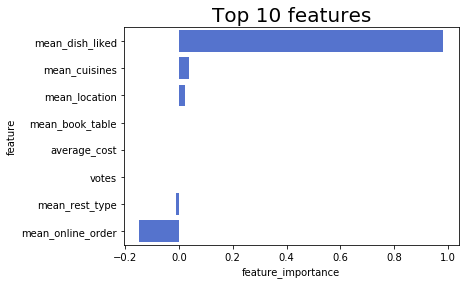

In [218]:
var_imp_plot(base_imp[:10],"Top 10 features")

In below blog explained negative feature value meaning.
- https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
- In short, it is saying we can remove those features.

## Output Visualization

In [219]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_lr })
Randpred

,actual,pred
35957,4.0,4.004962
4975,4.0,4.007328
21830,3.9,3.888549
11982,3.7,3.700317
2597,3.8,3.789058
...,...,...
6961,3.9,4.003845
19450,4.1,4.100658
32469,3.5,3.419166
3029,4.1,4.079376


### Model - 2 SGD Regression Model

In [220]:
sgdReg = linear_model.SGDRegressor()
sgdReg.fit(train_data,y_train)
y_pred_sgdr = sgdReg.predict(test_data)

mse(y_test, y_pred_sgdr)

8.230513552653216e+28

- No need to find feature importance, model is not learning.

### Model - 3 Random Forest Regressor Model

In [221]:
rfr = RandomForestRegressor()
rfr.fit(train_data,y_train)
y_pred_rfr = rfr.predict(test_data)

mse(y_test, y_pred_rfr)

0.0034227993635832414

### Hyperparam Tuning

In [222]:
tuned_parameters = {'n_estimators': [250,500,1000,1200]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(train_data, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [250, 500, 1000,

In [223]:
print(grd_regressor.best_params_)

{'n_estimators': 1000}


### Best Model "Random forest Regreesion"

In [224]:
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(train_data,y_train)
y_pred_rfr = rfr.predict(test_data)

mse(y_test, y_pred_rfr)

0.0031793854812790833

In [225]:
base_imp = imp_df(train_data.columns, rfr.feature_importances_)
base_imp[:10]

,feature,feature_importance
0,mean_dish_liked,0.967827
1,mean_cuisines,0.009445
2,votes,0.009359
3,mean_location,0.005244
4,average_cost,0.004073
5,mean_rest_type,0.002686
6,mean_online_order,0.000928
7,mean_book_table,0.000438


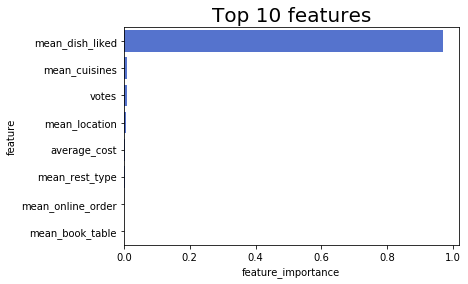

In [226]:
var_imp_plot(base_imp[:10],"Top 10 features")

###  Output Visualization

In [227]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
35957,4.0,4.000000
4975,4.0,3.999400
21830,3.9,3.900000
11982,3.7,3.700000
2597,3.8,3.800000
...,...,...
6961,3.9,4.000000
19450,4.1,4.100000
32469,3.5,3.475198
3029,4.1,4.100000


## 5. Model Compare

In [228]:
from prettytable import PrettyTable


x = PrettyTable()
x.field_names =  ['Model','MSE']

x.add_row(["SGD Regressor 7 ONEHOT Features", 8.091e+30])
x.add_row(["SGD Regressor Response coded Features", 6.926e+29])
x.add_row(["SGD Regressor 5 ONEHOT Features", 2.069e+28])

x.add_row(["Linear Regression 5 ONEHOT Features", 0.12780])
x.add_row(["Random Forest Regressor 5 ONEHOT Features", 0.03485])

x.add_row(["Linear Regression 7 ONEHOT Features", 0.04308])
x.add_row(["Random Forest Regressor 7 ONEHOT Features", 0.01404])

x.add_row(["Linear Regression Response coded Features", 0.00948])
x.add_row(["Random Forest Regressor Response coded Features", 0.00353])



print('\n')
print(x)



+-------------------------------------------------+-----------+
|                      Model                      |    MSE    |
+-------------------------------------------------+-----------+
|         SGD Regressor 7 ONEHOT Features         | 8.091e+30 |
|      SGD Regressor Response coded Features      | 6.926e+29 |
|         SGD Regressor 5 ONEHOT Features         | 2.069e+28 |
|       Linear Regression 5 ONEHOT Features       |   0.1278  |
|    Random Forest Regressor 5 ONEHOT Features    |  0.03485  |
|       Linear Regression 7 ONEHOT Features       |  0.04308  |
|    Random Forest Regressor 7 ONEHOT Features    |  0.01404  |
|    Linear Regression Response coded Features    |  0.00948  |
| Random Forest Regressor Response coded Features |  0.00353  |
+-------------------------------------------------+-----------+


## 6. Summary

We collect data from CSV file, half of values were missing, we did not throw up all values, instead of throw NULL value we tried to fill estimate values using related colomn. 
<br>
We tried only 5 one-hot encoded features and try different models Random Forest Regressor was most learning model, so we tune model using **gridsearch** technic, **minimal MSE** = 0.03485.
<br>
Then we tried with 7 one-hot encoded features and try on different models.Again Random Forest regressor was winning the race. <br>
we achieved **MSE = 0.01404**.
<br><br>

Then we done some **Feature Engineering**, used response coded feature, but this time "Linear Regression" perform well than previous model , Random Forest Regressor is winning the race as usual.
Finally we achieved **MSE =0.00353**.
<br>

End of the day,below model are best among all the version.

- Random Forest Regressor Response coded Features ==>  0.00353  


# Reference:

- https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
- https://medium.com/@purnasaigudikandula/zomato-bangalore-restaurant-analysis-and-rating-prediction-df277321c7cd
- https://www.kaggle.com/hindamosh/funny-banglore-restaurants-analysis
- https://medium.com/@pranaysawant22/zomato-restaurant-rate-prediction-2093cb685430